# Guia do funcionamento da Simulação do Blind Quantum Computing
##### O documento tem o objetivo de demostrar o funcionamento da simulação dos protocolos Childs e BFK no BQC.
#### IMPORTANDO AS DEPENDÊNCIAS


In [1]:
import random
from quantumnet.components import Network, Host
from quantumnet.components import ServerNode, ClientNode, RegularNode
from quantumnet.objects import Qubit, Logger

##### É inicializada a rede, com uma topologia de grade, que apresenta 1 servidor (nó verde) e 8 clientes (nós vermelhos).

Hosts inicializados
Canais inicializados
Pares EPRs adicionados


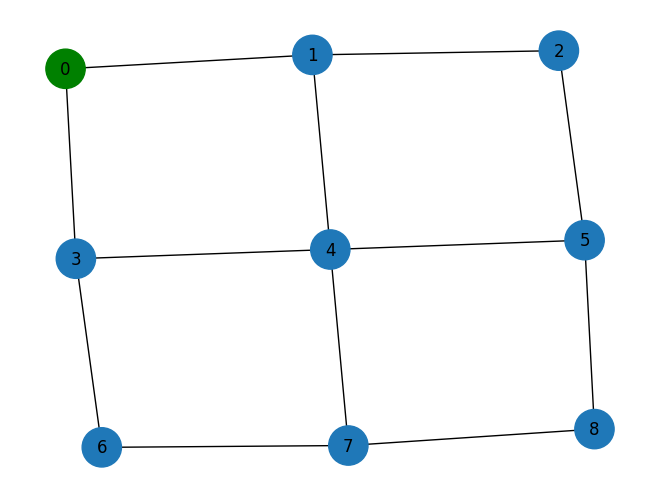

In [2]:
rede = Network()
rede.set_ready_topology('grade',8,3,3)  # Exemplo de uma grade 3x3 com  clientes e 1 servidor
rede.draw()
Logger.activate(Logger)

##### A realização da simulação de uma requesição acontece de forma em que vamos passar uma função para a geração de um circuito aleatório com o número de qubits e número de portas passados como parâmetros e a escolha de um protocolo para executar esse circuito. O protocolo escolhido foi o AC_BQC, Childs, e o cliente é (alice_id).

In [3]:
circuit, num_qubits = rede.generate_random_circuit(num_qubits=5, num_gates=30) 
rede.application_layer.run_app("AC_BQC", alice_id=6, bob_id=0, num_qubits=num_qubits,scenario=2)

          ┌───┐     ┌───┐┌───┐┌───┐             ┌───┐                 ┌───┐   
q_0: ──■──┤ S ├──■──┤ T ├┤ H ├┤ X ├───────────■─┤ Z ├───────────■───■─┤ X ├─■─
       │  └───┘  │  └───┘└───┘└───┘┌───┐┌───┐ │ └───┘         ┌─┴─┐ │ └───┘ │ 
q_1: ──┼─────────┼────X─────────■──┤ X ├┤ X ├─■───■───■──■──X─┤ X ├─┼───────┼─
     ┌─┴─┐       │    │  ┌───┐┌─┴─┐├───┤└─┬─┘     │   │  │  │ ├───┤ │       │ 
q_2: ┤ X ├───────■────X──┤ X ├┤ X ├┤ X ├──■───────┼───┼──■──┼─┤ H ├─┼───────┼─
     ├───┤┌───┐┌───┐     └───┘└───┘└─┬─┘          │   │     │ └───┘ │       │ 
q_3: ┤ T ├┤ Z ├┤ Z ├──■──────────────■────────────┼───┼─────┼───────┼───────┼─
     ├───┤├───┤└───┘┌─┴─┐┌───┐                  ┌─┴─┐ │     │       │       │ 
q_4: ┤ S ├┤ T ├─────┤ X ├┤ S ├──────────────────┤ X ├─■─────X───────■───────■─
     └───┘└───┘     └───┘└───┘                  └───┘                         


2024-12-23 11:01:07,432: Circuito aleatório gerado com 5 qubits e 30 portas. Instruções sobre o circuito.
2024-12-23 11:01:07,432: Instrução: {'operation': 'cx', 'qubits': [0, 2]}
2024-12-23 11:01:07,432: Instrução: {'operation': 's', 'qubits': [0]}
2024-12-23 11:01:07,432: Instrução: {'operation': 'cz', 'qubits': [2, 0]}
2024-12-23 11:01:07,432: Instrução: {'operation': 't', 'qubits': [0]}
2024-12-23 11:01:07,432: Instrução: {'operation': 't', 'qubits': [3]}
2024-12-23 11:01:07,432: Instrução: {'operation': 'z', 'qubits': [3]}
2024-12-23 11:01:07,432: Instrução: {'operation': 's', 'qubits': [4]}
2024-12-23 11:01:07,432: Instrução: {'operation': 'swap', 'qubits': [1, 2]}
2024-12-23 11:01:07,432: Instrução: {'operation': 'x', 'qubits': [2]}
2024-12-23 11:01:07,432: Instrução: {'operation': 'z', 'qubits': [3]}
2024-12-23 11:01:07,432: Instrução: {'operation': 't', 'qubits': [4]}
2024-12-23 11:01:07,432: Instrução: {'operation': 'cx', 'qubits': [3, 4]}
2024-12-23 11:01:07,432: Instrução: 

In [4]:
rede.application_layer.avg_fidelity_on_applicationlayer()

A média das fidelidades das rotas é: 0.9384


0.9383555182457167

In [5]:
rede.application_layer.print_route_fidelities()

Fidelidades das rotas utilizadas:
0.9193
0.9178
0.9817
0.9518
0.9338
0.9144
0.9129
0.9765
0.9467
0.9288


##### Nesse caso, foi executado o protocolo BFK, com parâmetros como 5 qubits para 5 rounds e 30 portas. Além da escolha de um nó como cliente= alice_id.

In [6]:
circuito, num_qubits = rede.generate_random_circuit(num_qubits=10, num_gates=30)
resultado_bfk = rede.application_layer.run_app("BFK_BQC", alice_id=2, bob_id=0, num_qubits=num_qubits, num_rounds=10, scenario=1)

          ┌───┐┌───┐                                      
q_0: ─────┤ Y ├┤ Z ├─■─────────────X──────────────────────
          └───┘└───┘ │             │       ┌───┐          
q_1: ────────────────┼────────■────┼────■──┤ X ├──────────
          ┌───┐      │        │    │    │  ├───┤┌───┐┌───┐
q_2: ─────┤ Z ├──X───┼───■────┼────┼────┼──┤ Y ├┤ Y ├┤ Y ├
     ┌───┐├───┤  │   │   │    │    │    │  └───┘├───┤└───┘
q_3: ┤ Z ├┤ T ├──┼───■───┼────┼────┼────┼───────┤ X ├─────
     └───┘└───┘  │       │    │    │    │  ┌───┐└─┬─┘     
q_4: ────────────X───────┼────┼────┼────■──┤ H ├──■───────
               ┌───┐     │    │    │       └───┘          
q_5: ───────■──┤ Y ├─────┼────┼────┼──────────────────────
     ┌───┐  │  ├───┤     │    │    │                      
q_6: ┤ T ├──┼──┤ Y ├─────┼────┼────┼──────────────────────
     ├───┤  │  └───┘   ┌─┴─┐  │    │  ┌───┐┌───┐          
q_7: ┤ Y ├──┼────────X─┤ X ├──┼────┼──┤ Z ├┤ Z ├──────────
     ├───┤  │  ┌───┐ │ ├───┤  │    │  └───┘└───┘        

2024-12-23 11:01:07,828: Circuito aleatório gerado com 10 qubits e 30 portas. Instruções sobre o circuito.
2024-12-23 11:01:07,829: Instrução: {'operation': 't', 'qubits': [8]}
2024-12-23 11:01:07,831: Instrução: {'operation': 'z', 'qubits': [3]}
2024-12-23 11:01:07,832: Instrução: {'operation': 'cx', 'qubits': [5, 9]}
2024-12-23 11:01:07,834: Instrução: {'operation': 'y', 'qubits': [7]}
2024-12-23 11:01:07,835: Instrução: {'operation': 'cx', 'qubits': [9, 8]}
2024-12-23 11:01:07,837: Instrução: {'operation': 't', 'qubits': [3]}
2024-12-23 11:01:07,838: Instrução: {'operation': 'swap', 'qubits': [7, 9]}
2024-12-23 11:01:07,839: Instrução: {'operation': 't', 'qubits': [6]}
2024-12-23 11:01:07,840: Instrução: {'operation': 'z', 'qubits': [2]}
2024-12-23 11:01:07,841: Instrução: {'operation': 'x', 'qubits': [8]}
2024-12-23 11:01:07,842: Instrução: {'operation': 'cx', 'qubits': [1, 9]}
2024-12-23 11:01:07,844: Instrução: {'operation': 'y', 'qubits': [0]}
2024-12-23 11:01:07,845: Instrução:

##### Nessa função, podemos coletar a métrica da média da fidelidade dos pares EPRs utilizados nas duas requesições.

In [7]:
rede.application_layer.avg_fidelity_on_applicationlayer()

A média das fidelidades das rotas é: 0.9420


0.9419567183723927

##### Além de printar as fidelidades das rotas.

In [8]:
rede.application_layer.print_route_fidelities()

Fidelidades das rotas utilizadas:
0.9193
0.9178
0.9817
0.9518
0.9338
0.9144
0.9129
0.9765
0.9467
0.9288
0.9245
0.9424
0.9857
0.9736
0.9439
0.9533
0.9583
0.9300
0.9480
0.8958


##### Pode ser coletado os EPRs utilizados na camada de aplicação, consequentemente nas requesições e protocolos.

In [9]:
rede.get_total_useds_eprs()

2024-12-23 11:01:08,015: Eprs criados na camada PhysicalLayer: 10
2024-12-23 11:01:08,016: Eprs usados na camada LinkLayer: 0
2024-12-23 11:01:08,018: Eprs usados na camada NetworkLayer: 0
2024-12-23 11:01:08,020: Eprs usados na camada ApplicationLayer: 40


50